In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.graphics.regressionplots import influence_plot

In [270]:
toyota=pd.read_csv("D:\CSV FIles Path\Assignments\MLR\ToyotaCorolla.csv")
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [271]:
# Check the ROW and Coumns in a dataset
toyota.shape

(1436, 38)

### Exploratory Data Analysis (EDA)

In [272]:
## Retain only the column require for the prediction

In [273]:
toyota1=toyota[["Price","Age_08_04","KM","HP","Cylinders","Doors","Gears","Weight"]]
toyota1

,Price,Age_08_04,KM,HP,Cylinders,Doors,Gears,Weight
0,13500,23,46986,90,4,3,5,1165
1,13750,23,72937,90,4,3,5,1165
2,13950,24,41711,90,4,3,5,1165
3,14950,26,48000,90,4,3,5,1165
4,13750,30,38500,90,4,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025
1432,10845,72,19000,86,4,3,5,1015
1433,8500,71,17016,86,4,3,5,1015
1434,7250,70,16916,86,4,3,5,1015


In [274]:
# Check the data shape after retaining selected column
toyota1.shape

(1436, 8)

In [275]:
# Value counts in Doors Column
# A column having a single value can be further dropped for prediction 
toyota1['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [276]:
# Value counts in Gears Column
toyota1['Gears'].value_counts()

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64

In [277]:
# Value counts in Cylinders Column
toyota1['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [278]:
# Check the DATA TYPES
toyota1.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
Cylinders    int64
Doors        int64
Gears        int64
Weight       int64
dtype: object

In [279]:
# Find missing values in a dataset
toyota1[toyota1.isnull().any(axis=1)]

,Price,Age_08_04,KM,HP,Cylinders,Doors,Gears,Weight


In [280]:
# Find missing values in each column
toyota1.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Cylinders    0
Doors        0
Gears        0
Weight       0
dtype: int64

In [281]:
toyota1[toyota1.duplicated()]

,Price,Age_08_04,KM,HP,Cylinders,Doors,Gears,Weight
113,24950,8,13253,116,4,5,5,1320


In [282]:
toyota1=toyota1.drop_duplicates()
toyota1.shape

(1435, 8)

In [283]:
# Drop Cyclinder Column as only single 4. Deleting this column will not have any impact
#toyota1=toyota1.drop('Cylinders',axis=1)
#toyota1.shape
toyota1

,Price,Age_08_04,KM,HP,Cylinders,Doors,Gears,Weight
0,13500,23,46986,90,4,3,5,1165
1,13750,23,72937,90,4,3,5,1165
2,13950,24,41711,90,4,3,5,1165
3,14950,26,48000,90,4,3,5,1165
4,13750,30,38500,90,4,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025
1432,10845,72,19000,86,4,3,5,1015
1433,8500,71,17016,86,4,3,5,1015
1434,7250,70,16916,86,4,3,5,1015


In [284]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age_08_04  1435 non-null   int64
 2   KM         1435 non-null   int64
 3   HP         1435 non-null   int64
 4   Cylinders  1435 non-null   int64
 5   Doors      1435 non-null   int64
 6   Gears      1435 non-null   int64
 7   Weight     1435 non-null   int64
dtypes: int64(8)
memory usage: 100.9 KB


In [285]:
# Remame Age_08_04.
toyota1=toyota1.rename({'Age_08_04':'Age'},axis=1)
toyota1.head

<bound method NDFrame.head of       Price  Age     KM   HP  Cylinders  Doors  Gears  Weight
0     13500   23  46986   90          4      3      5    1165
1     13750   23  72937   90          4      3      5    1165
2     13950   24  41711   90          4      3      5    1165
3     14950   26  48000   90          4      3      5    1165
4     13750   30  38500   90          4      3      5    1170
...     ...  ...    ...  ...        ...    ...    ...     ...
1431   7500   69  20544   86          4      3      5    1025
1432  10845   72  19000   86          4      3      5    1015
1433   8500   71  17016   86          4      3      5    1015
1434   7250   70  16916   86          4      3      5    1015
1435   6950   76      1  110          4      5      5    1114

[1435 rows x 8 columns]>

### Correlation Analysis. Dependent VS Independent Variable

In [286]:
toyota1.corr()

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,NaN,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,NaN,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,NaN,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,NaN,0.091803,0.209642,0.087143
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doors,0.183604,-0.146929,-0.035193,0.091803,NaN,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,NaN,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,NaN,0.301734,0.021238,1.000000


## Lets VISUALIZE THE CORRELATION
## Scatterplot between variables along with histograms

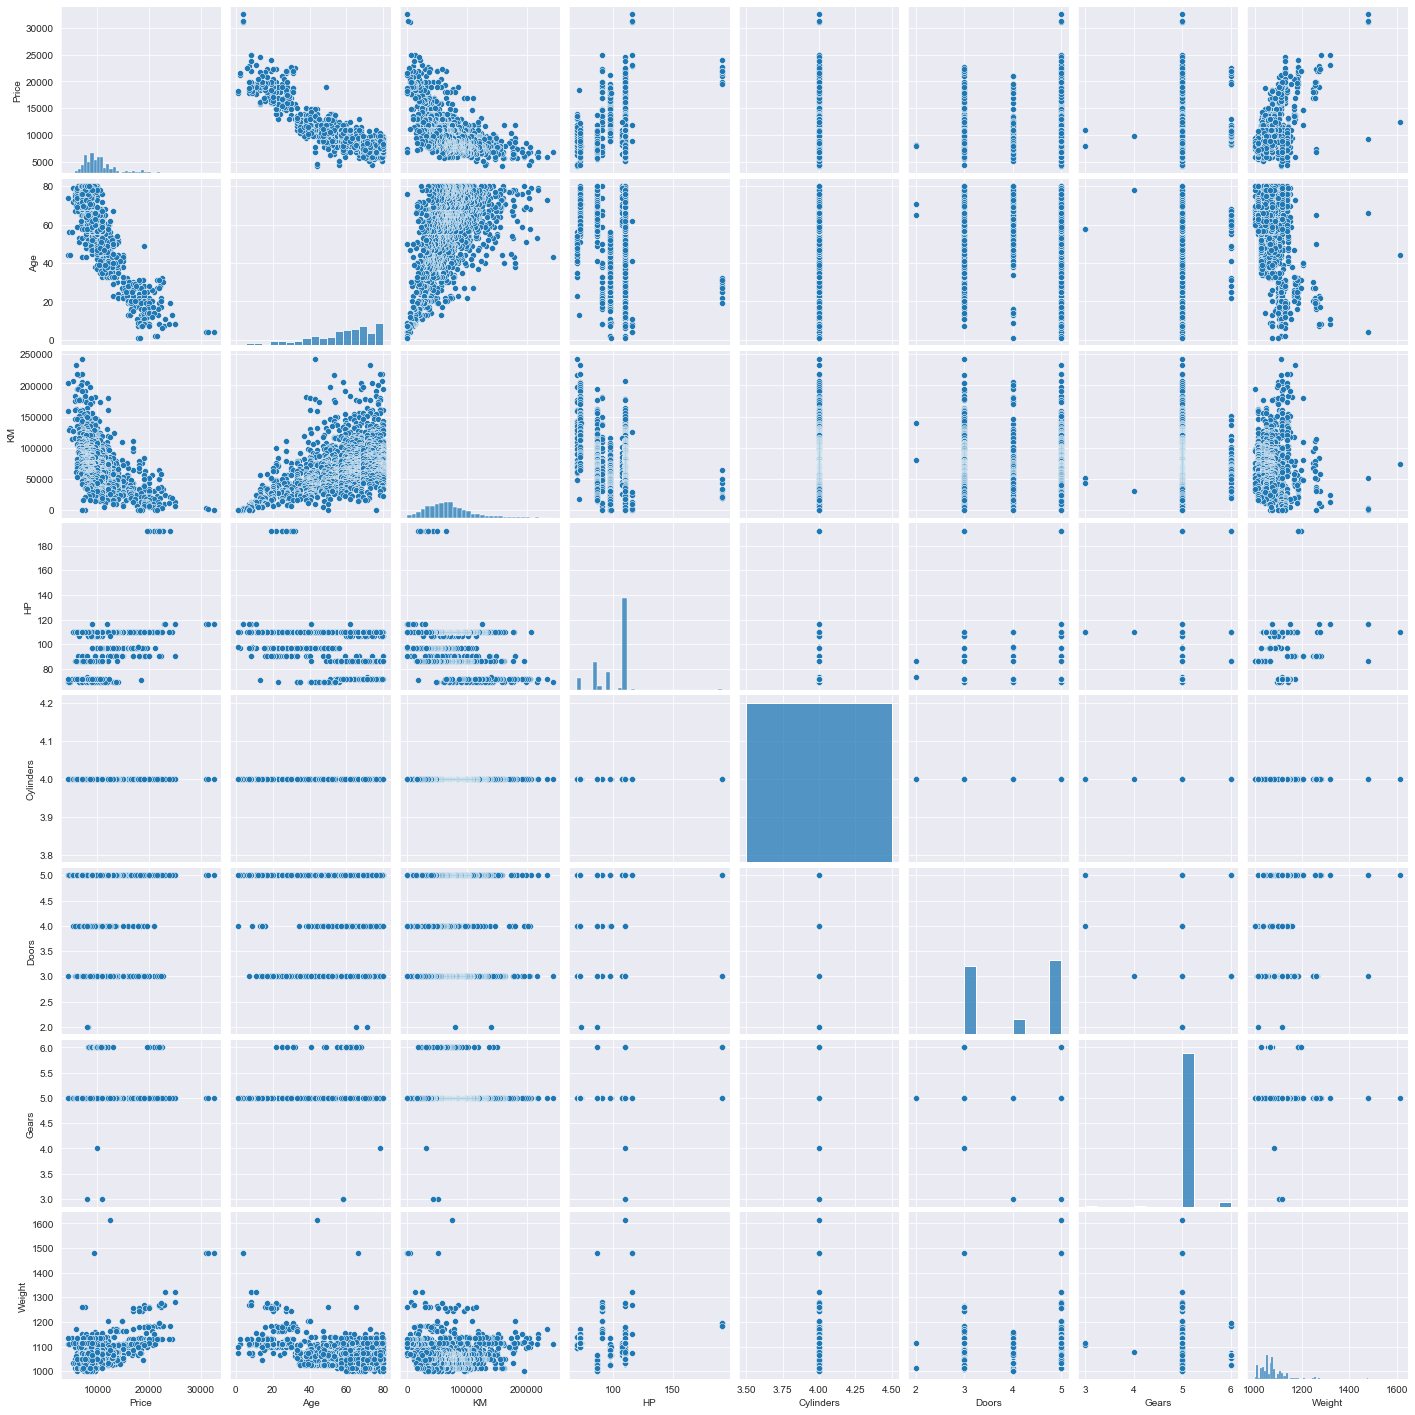

In [287]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

## Build Regression MODEL

In [288]:
# Pricing is the Dependent Variable.
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=toyota1).fit()

In [289]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:31:25   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6838.9872   1313.977     -5.205      0.000   -9416.519   -4261.456
Age         -122.2882      2.614    -46.775      0.000    -127.417    -117.160
KM            -0.0199      0.001    -16.490      0.000      -0.022      -0.018
HP            28.3278      2.613     10.841      0.000      23.202      33.454
Doors         -8.7158     39.970     -0.218      0.827     -87.121      69.690
Gears        625.2978    197.289      3.169      0.002     238.291    1012.305
Weight        18.4551      0.834     22.142      0.000      16.820      20.090
==============================================================================
Omnibus:                      194.732   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.680
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## P value of feature Door seems more than 0.05 hence lets find Individual and Combine P Significance

In [290]:
# Model with Feature Doors and check the P significance
model2 = smf.ols('Price~Doors',data=toyota1).fit()

In [291]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.40e-12
Time:                        15:31:26   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets find the Collinearity among the Independent Features

## Apply Variance Inflation Factor (VIF) method to identify Multi Collenearity among the Independent Features

In [294]:
#  For VIF, You need a R Squared for Age
rsq_age = smf.ols('Age~KM+HP+Doors+Gears+Weight',data=toyota1).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age+HP+Doors+Gears+Weight',data=toyota1).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age+Doors+Gears+Weight',data=toyota1).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_Doors = smf.ols('Doors~KM+Age+HP+Gears+Weight',data=toyota1).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~KM+Age+HP+Doors+Weight',data=toyota1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Weight = smf.ols('Weight~KM+Age+HP+Doors+Gears',data=toyota1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)


In [295]:
# Storing VIF values in a data frame by placing them in a dictionary
vif_df = {'Variables':['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_Doors,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(vif_df)  
Vif_frame

,Variables,VIF
0,Age,1.866057
1,KM,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Gears,1.096575
5,Weight,1.502749


## Inference from VIF method: No Multi Collenearity among the Independent Features as V value is less then 20

## Calculate Predicted Value and Residual Value

In [296]:
model1.fittedvalues

0       16562.127831
1       16044.981831
2       16544.958657
3       16175.056306
4       15967.492947
            ...     
1431     8766.769166
1432     8246.121591
1433     8407.946570
1434     8532.227599
1435    10625.069874
Length: 1435, dtype: float64

In [297]:
toyota1

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight
0,13500,23,46986,90,4,3,5,1165
1,13750,23,72937,90,4,3,5,1165
2,13950,24,41711,90,4,3,5,1165
3,14950,26,48000,90,4,3,5,1165
4,13750,30,38500,90,4,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025
1432,10845,72,19000,86,4,3,5,1015
1433,8500,71,17016,86,4,3,5,1015
1434,7250,70,16916,86,4,3,5,1015


In [298]:
# Calculate Predicted Value and Residual Value
toyota1['Predicted']=model1.fittedvalues
toyota1['Errors']=model1.resid
toyota1.head()

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight,Predicted,Errors
0,13500,23,46986,90,4,3,5,1165,16562.127831,-3062.127831
1,13750,23,72937,90,4,3,5,1165,16044.981831,-2294.981831
2,13950,24,41711,90,4,3,5,1165,16544.958657,-2594.958657
3,14950,26,48000,90,4,3,5,1165,16175.056306,-1225.056306
4,13750,30,38500,90,4,3,5,1170,15967.492947,-2217.492947


## Residual Analysis
## Test for Normality of residuals(errors) Q-Q Plot 

In [299]:
model1.resid

0      -3062.127831
1      -2294.981831
2      -2594.958657
3      -1225.056306
4      -2217.492947
           ...     
1431   -1266.769166
1432    2598.878409
1433      92.053430
1434   -1282.227599
1435   -3675.069874
Length: 1435, dtype: float64

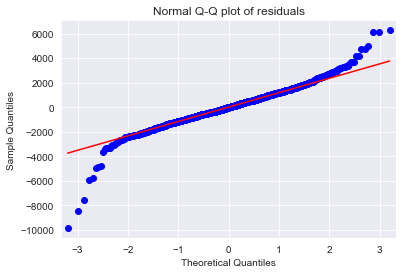

In [300]:
#Q-Q Plotting of Residuals
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [301]:
# Identify the Outliers among the residuals
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

In [302]:
# Identify the Outliers among the residuals
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

## Residual Visualisation

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

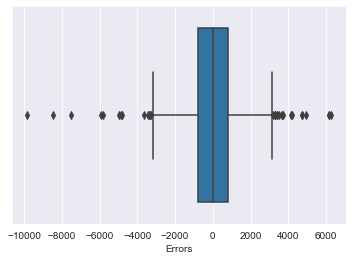

In [303]:
sns.boxplot(toyota1['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

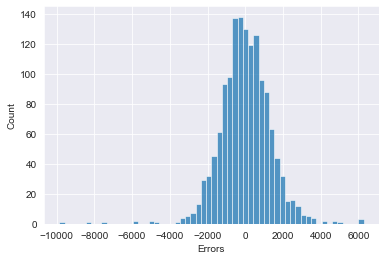

In [304]:
sns.histplot(toyota1["Errors"])

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

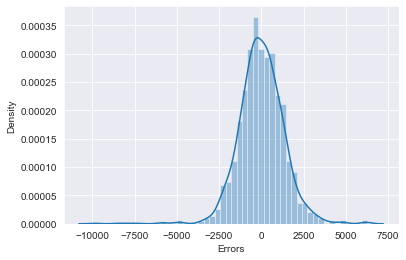

In [305]:
sns.distplot(toyota1['Errors'])

## Residual Plot for Homoscedasticity

In [306]:
# Normalising the errors
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

### Check for any pattern in RESIDUAL VS PREDICTED VALUES

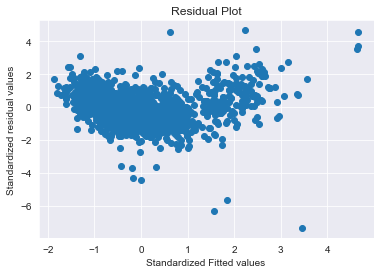

In [307]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


## Residual Vs Regressors

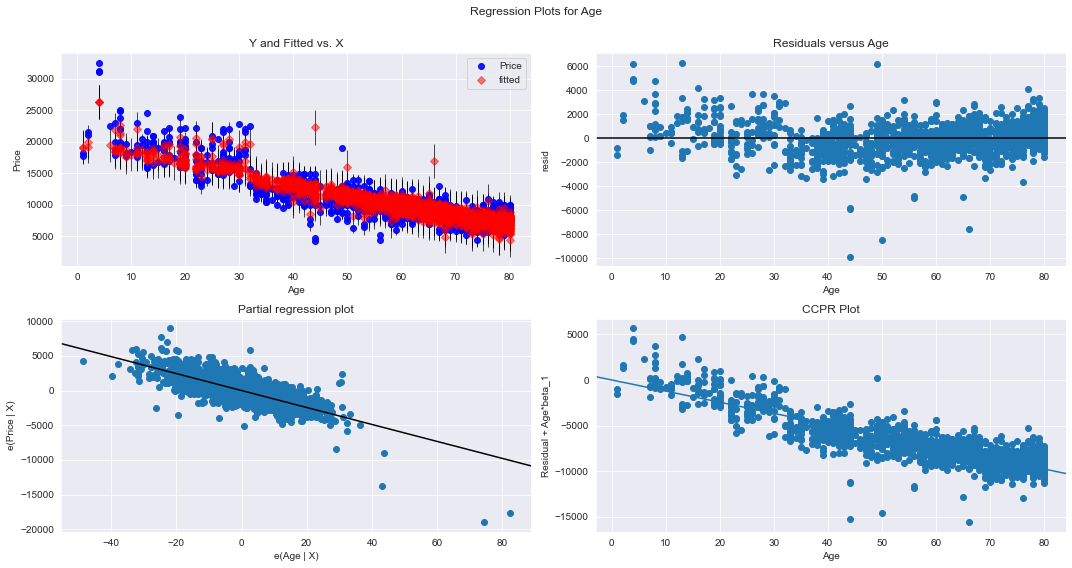

In [308]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

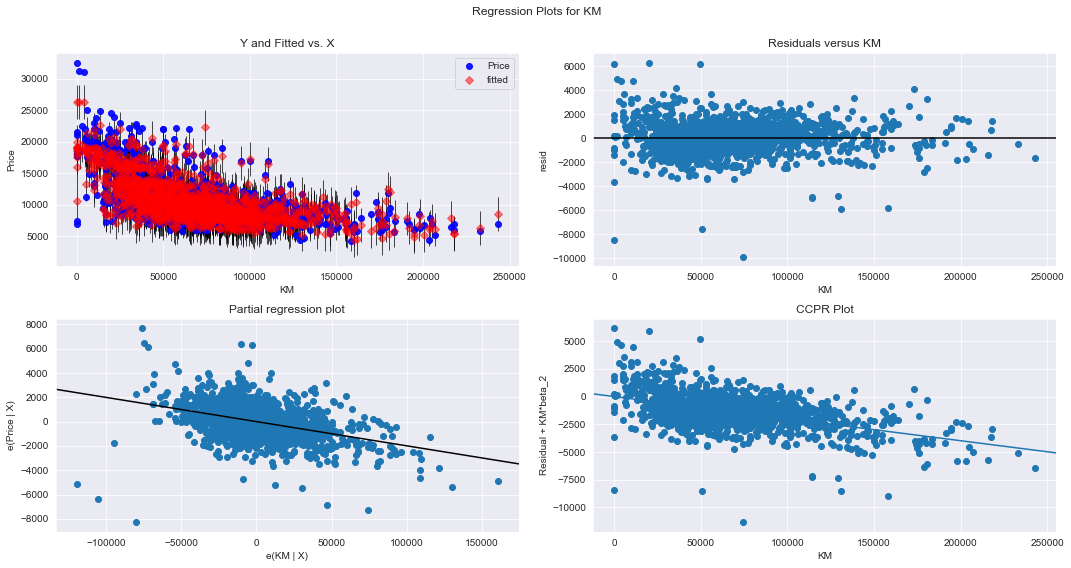

In [309]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

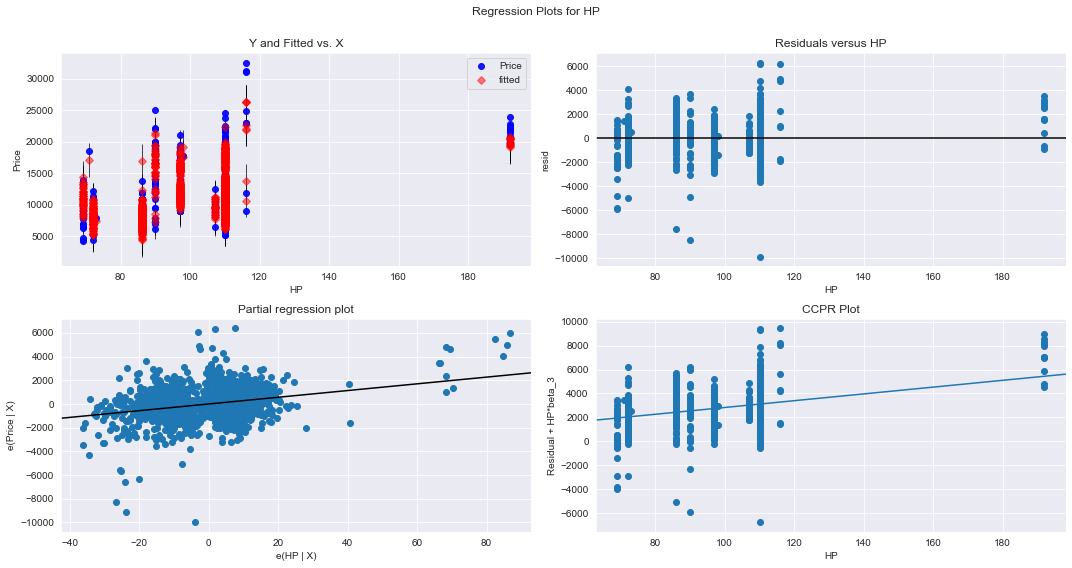

In [310]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

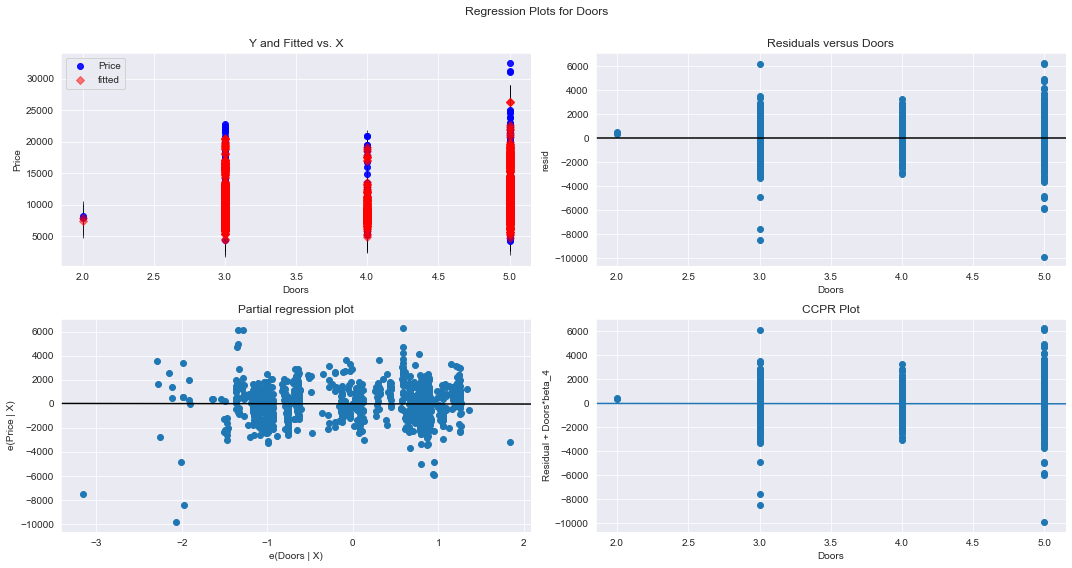

In [311]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

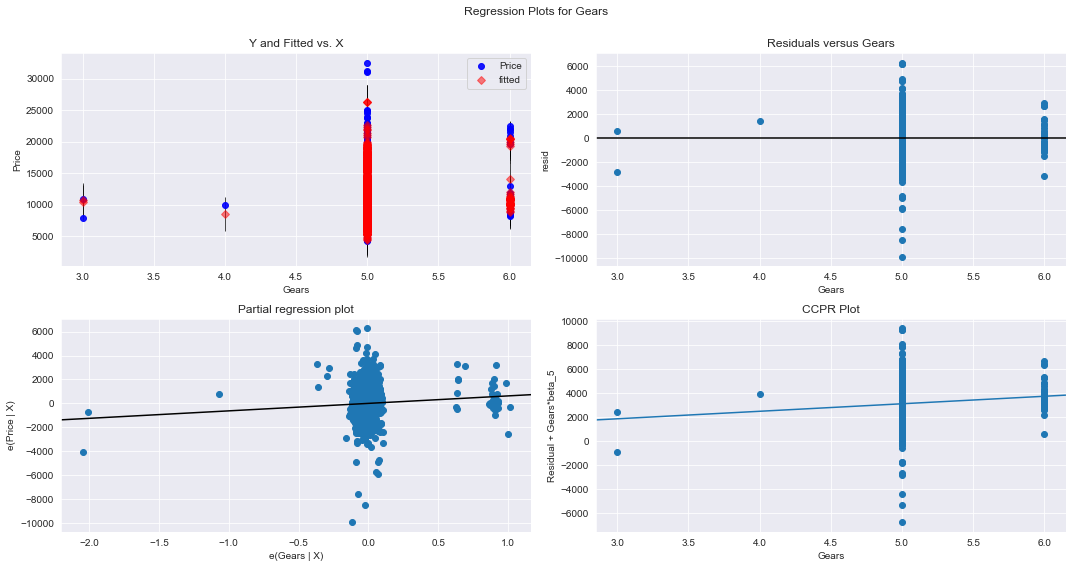

In [312]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

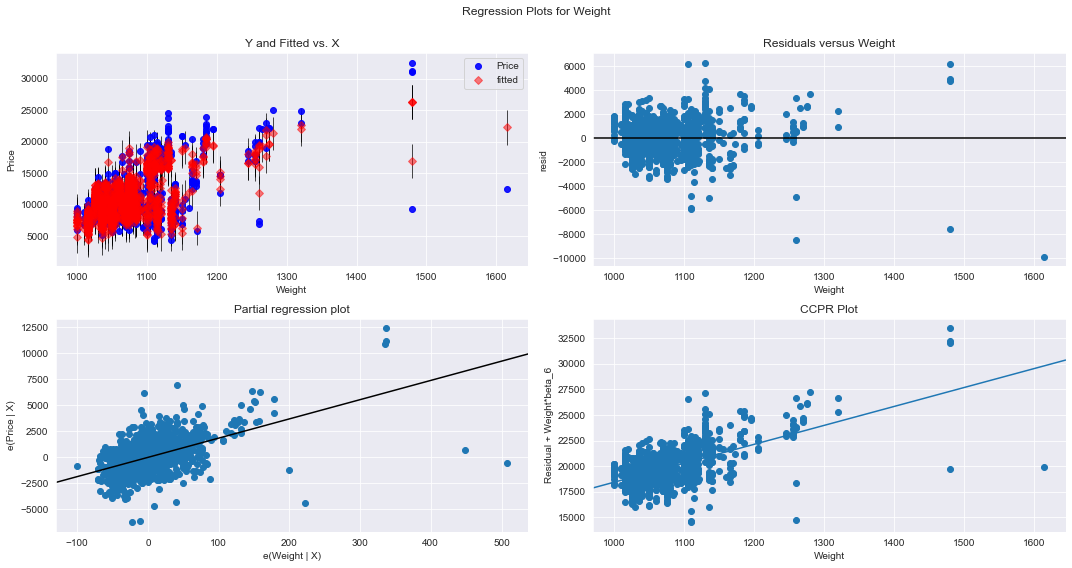

In [313]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook's Distance

In [314]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance
c

array([4.84834865e-03, 2.81504747e-03, 3.49062601e-03, ...,
       4.29681961e-06, 8.15626746e-04, 1.20038984e-02])

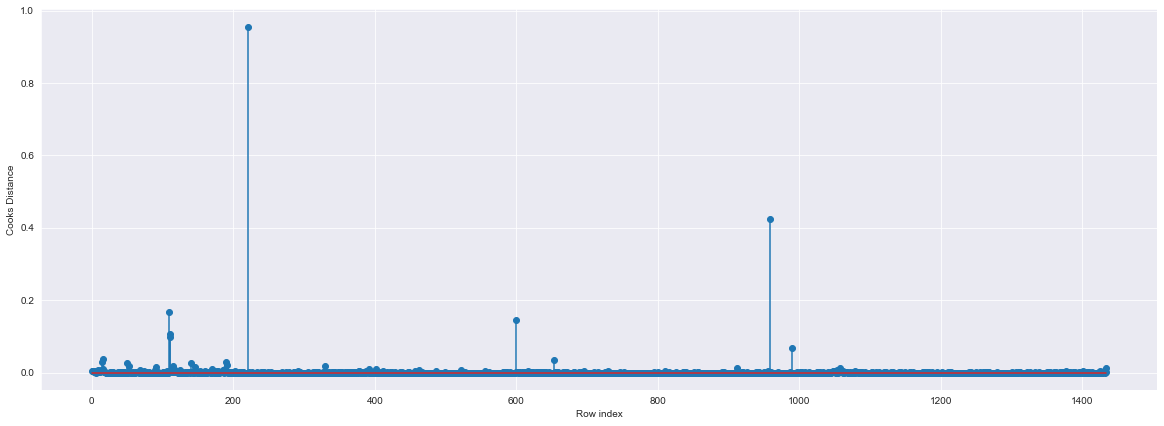

In [315]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [316]:
# Index and value of influencer where C>0.5
(np.argmax(c),np.max(c))

(220, 0.9561392473390729)

## Check the High Influence points

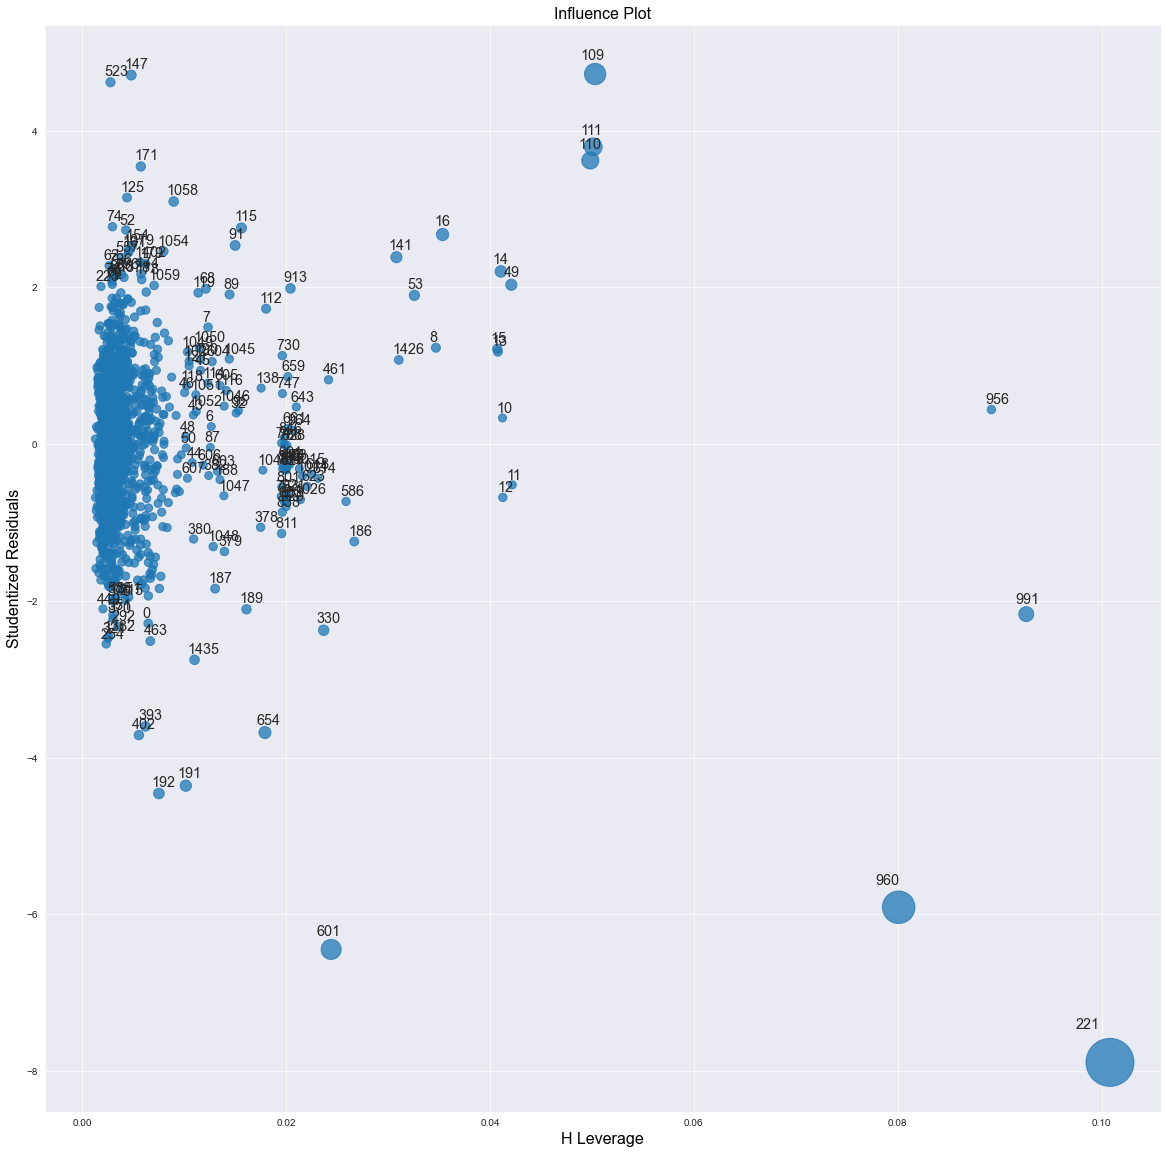

In [317]:
# Plot the leverage VS Residuals
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model1,ax = ax)
#influence_plot(model1)
#plt.show()


## COOK Distance Formula

In [318]:
#K = No. of Variables (Columns) & N = No. of observations (ROWS)
k = toyota1.shape[1]
n = toyota1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.022996515679442508

#### From the above plot, it is evident that data point 80 is the influencers

In [319]:
toyota1[toyota1.index.isin([221])]

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight,Predicted,Errors
221,12450,44,74172,110,4,5,5,1615,22306.251521,-9856.251521


In [320]:
toyota1.head()

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight,Predicted,Errors
0,13500,23,46986,90,4,3,5,1165,16562.127831,-3062.127831
1,13750,23,72937,90,4,3,5,1165,16044.981831,-2294.981831
2,13950,24,41711,90,4,3,5,1165,16544.958657,-2594.958657
3,14950,26,48000,90,4,3,5,1165,16175.056306,-1225.056306
4,13750,30,38500,90,4,3,5,1170,15967.492947,-2217.492947


In [321]:
model1.aic

24756.033306592886

## Improving the Model

In [322]:
#Load the data
toyota_new=toyota1.copy()
toyota_new

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight,Predicted,Errors
0,13500,23,46986,90,4,3,5,1165,16562.127831,-3062.127831
1,13750,23,72937,90,4,3,5,1165,16044.981831,-2294.981831
2,13950,24,41711,90,4,3,5,1165,16544.958657,-2594.958657
3,14950,26,48000,90,4,3,5,1165,16175.056306,-1225.056306
4,13750,30,38500,90,4,3,5,1170,15967.492947,-2217.492947
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025,8766.769166,-1266.769166
1432,10845,72,19000,86,4,3,5,1015,8246.121591,2598.878409
1433,8500,71,17016,86,4,3,5,1015,8407.946570,92.053430
1434,7250,70,16916,86,4,3,5,1015,8532.227599,-1282.227599


In [323]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_inf=toyota_new.drop(toyota_new.index[[221]],axis=0)

In [324]:
#Drop the original index
#car1=car1.drop(['index'],axis=1)

In [325]:
toyota_inf

,Price,Age,KM,HP,Cylinders,Doors,Gears,Weight,Predicted,Errors
0,13500,23,46986,90,4,3,5,1165,16562.127831,-3062.127831
1,13750,23,72937,90,4,3,5,1165,16044.981831,-2294.981831
2,13950,24,41711,90,4,3,5,1165,16544.958657,-2594.958657
3,14950,26,48000,90,4,3,5,1165,16175.056306,-1225.056306
4,13750,30,38500,90,4,3,5,1170,15967.492947,-2217.492947
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025,8766.769166,-1266.769166
1432,10845,72,19000,86,4,3,5,1015,8246.121591,2598.878409
1433,8500,71,17016,86,4,3,5,1015,8407.946570,92.053430
1434,7250,70,16916,86,4,3,5,1015,8532.227599,-1282.227599


In [326]:
toyota_inf.shape

(1434, 10)

## Identify the best MODEL and Compare

In [327]:
# All Features after Removing the Influener Row no. 221
model_inf_Drop= smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data = toyota_inf).fit()

In [328]:
(model_inf_Drop.rsquared,model_inf_Drop.aic)

(0.861627203741172, 24739.338216109594)

In [329]:
# Removing feature Doors and check the regression model
model_doors= smf.ols('Price~Age+KM+HP+Gears+Weight',data = toyota_inf).fit()

In [330]:
(model_doors.rsquared,model_doors.aic)

(0.8616233024118553, 24737.3786462196)

In [331]:
# Making a data frame to check which model is the best


model_df = {
    "Model": ["model1", "model_inf_Drop", "model_doors"],
    "Model Info": ["All features", "Excluding Influencer","Excluding Doors"],
    "rsquared": [model1.rsquared, model_inf_Drop.rsquared, 
                 model_doors.rsquared],
    "Adj rsquared": [model1.rsquared_adj, model_inf_Drop.rsquared_adj, 
                 model_doors.rsquared_adj],
    "AIC": [model1.aic, model_inf_Drop.aic,model_doors.aic]
}

model_compare = pd.DataFrame(model_df)
model_compare

,Model,Model Info,rsquared,Adj rsquared,AIC
0,model1,All features,0.861595,0.861013,24756.033307
1,model_inf_Drop,Excluding Influencer,0.861627,0.861045,24739.338216
2,model_doors,Excluding Doors,0.861623,0.861139,24737.378646


## There is no signficant change in above Models, hence we can go with model1 for the prediction

## Predicting PRICING based on Hypothetical feautures Values.

In [219]:
toyota_inf.mean()

Price        10720.058577
Age             55.991632
KM           68568.665272
HP             101.486053
Doors            4.032078
Gears            5.026499
Weight        1072.285216
Predicted    10719.429462
Errors           0.629115
dtype: float64

In [332]:
Price_pred={
    "Age":[48,55,60,72],
    "KM":[50000,67000,72000,90000],
    "HP":[90,69,110,98],
    "Doors":[2,3,4,5],
    "Gears":[5,6,5,6],
    "Weight":[1100,1300,1500,1600],
    
}
Price_pred

{'Age': [48, 55, 60, 72],
 'KM': [50000, 67000, 72000, 90000],
 'HP': [90, 69, 110, 98],
 'Doors': [2, 3, 4, 5],
 'Gears': [5, 6, 5, 6],
 'Weight': [1100, 1300, 1500, 1600]}

In [333]:
#New data for prediction in a DATAFRAME
Pricing=pd.DataFrame(Price_pred)
Pricing

,Age,KM,HP,Doors,Gears,Weight
0,48,50000,90,2,5,1100
1,55,67000,69,3,6,1300
2,60,72000,110,4,5,1500
3,72,90000,98,5,6,1600


In [334]:
#RUN Prediction Model for the New DATA Point
Pricing['Price Prediction']=model1.predict(Pricing)
Pricing

,Age,KM,HP,Doors,Gears,Weight,Price Prediction
0,48,50000,90,2,5,1100,12253.991431
1,55,67000,69,3,6,1300,14771.926468
2,60,72000,110,4,5,1500,18279.298230
3,72,90000,98,5,6,1600,18575.300985


## Applying Price Prediction Model on our Original Dataset

In [268]:
toyota1['Price Prediction']=model1.fittedvalues
toyota1

,Price,Age,KM,HP,Doors,Gears,Weight,Price Prediction
0,13500,23,46986,90,3,5,1165,16562.127831
1,13750,23,72937,90,3,5,1165,16044.981831
2,13950,24,41711,90,3,5,1165,16544.958657
3,14950,26,48000,90,3,5,1165,16175.056306
4,13750,30,38500,90,3,5,1170,15967.492947
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025,8766.769166
1432,10845,72,19000,86,3,5,1015,8246.121591
1433,8500,71,17016,86,3,5,1015,8407.946570
1434,7250,70,16916,86,3,5,1015,8532.227599
